Import package

In [1]:
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt
from skimage import io
import cv2
import numpy as np

Define Function

In [2]:
def show(img_,text):
    print(text,img_.shape,np.amin(img_),np.amax(img_))
    plt.imshow(img_)
    plt.title(text,fontsize=20)
    plt.xlabel(str(img_.shape))
    plt.ylabel(str(np.amin(img_))+' ~ '+str(np.amax(img_)))
    return

Import Image

raw image (483, 483, 3) 0 234


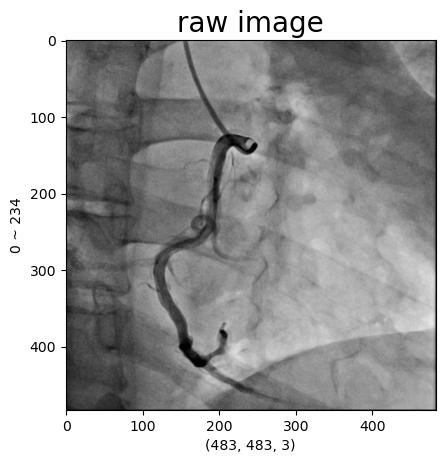

In [23]:
case2 = 'cases/case_02/CVAI-0029_RCA_LAO62_CRA2_34_image.png'
case3 = 'cases/case_03/CVAI-0213_LCX_LAO51_CRA23_34_image.png'
case4 = 'cases/case_04/CVAI-0294_LCX_LAO45_CRA15_37_image.png'
case5 = 'cases/case_05/CVAI-0338_RCA_LAO88_CRA0_23_image.png'
case5_clear = 'cases/case_05/CVAI-0338_RCA_LAO88_CRA0_clear.dcm.jpg'
case6 = 'cases/case_06/CVAI-0501_LAD_RAO11_CRA29_57_image.png'

case21 = '../competition_cases/case_21/CVAI-1570_RCA_LAO41_CAU0_21.png'
case22 = '../competition_cases/case_22/CVAI-0464_LCX_LAO38_CRA19_28.png'
case23 = '../competition_cases/case_23/CVAI-1726_RCA_LAO38_CAU0_19.png'
case24 = '../competition_cases/case_24/CVAI-0106_RCA_RAO29_CRA2_25.png'

diff = '../difference.png'

raw_image = cv2.imread(case24)
show(raw_image,'raw image')

Filtering the vessels

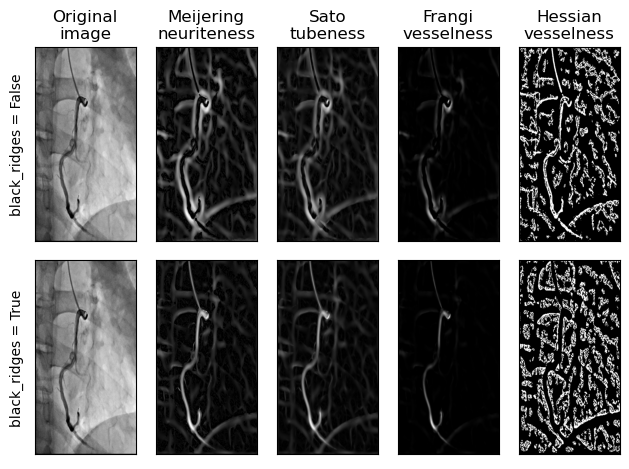

In [24]:
def identity(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image
gray_image = cv2.cvtColor(raw_image, cv2.COLOR_RGB2GRAY)  
cmap = plt.cm.gray
fig, axes = plt.subplots(2, 5)

for i, black_ridges in enumerate([0, 1]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        result = func(gray_image,black_ridges=i)
        axes[i, j].imshow(result, cmap=cmap, aspect='auto')

        if i == 0:
            axes[i, j].set_title(['Original\nimage', 'Meijering\nneuriteness',
                                  'Sato\ntubeness', 'Frangi\nvesselness',
                                  'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel('black_ridges = ' + str(bool(black_ridges)))
        # 儲存灰階圖
        if i >= 1:
            result = (result / np.max(result) * 255).astype(np.uint8)
            cv2.imwrite('images/' + str(func.__name__) + '_pred_img.jpg', result)

        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

True

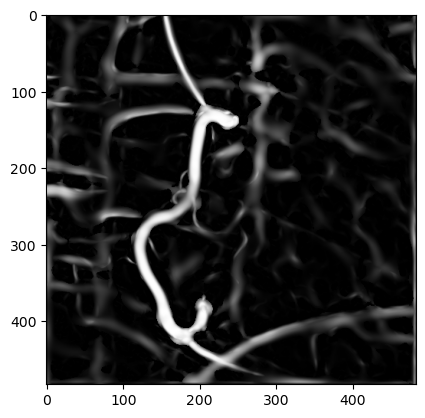

In [27]:
# 設置Frangi濾波器的參數
frangi_params = {
    'sigmas' : range(1, 10, 2),
    'alpha': 0.7,   # 用於調整濾波器對偏離板狀結構的敏感度。alpha越大，響應曲線越平滑，結構特徵的影響越小
    'beta': 0.9,    # 用於調整濾波器對偏離類斑點結構的敏感度。beta越大，響應曲線越平滑，斑點特徵的影響越小
    'gamma' : 0.05,   # 控制特徵響應的平均值。gamma越大，對應的特徵越大，gamma越小，對應的特徵越小
    'black_ridges': True,
    'mode': 'reflect',
    'cval': 0,
}

# 使用Frangi濾波器增強圖像中的細線型結構特徵
filtered = frangi(gray_image, **frangi_params)

# 調整圖像的對比度和亮度
filtered = cv2.normalize(filtered, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# 顯示結果圖像
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

# 儲存灰階圖
filtered = (filtered / np.max(filtered) * 255).astype(np.uint8)
cv2.imwrite('test_pred_img.png', filtered)

Read test mask

In [25]:
pred_image = cv2.imread('test_pred_img.jpg')
show(pred_image,'test Mask')
pred_mask = cv2.cvtColor(pred_image,cv2.COLOR_BGR2GRAY)
# # raw_mask = raw_mask.astype(np.float32)
pred_mask = pred_mask/255
show(pred_mask,'test Mask')
# # raw_mask = raw_mask.astype(np.uint8)
pred_mask[pred_mask>=0.5] = 1
pred_mask[pred_mask<0.] = 0
show(pred_mask,'test Mask')

AttributeError: 'NoneType' object has no attribute 'shape'

Show test mask and raw image

raw image (512, 512, 3) 93 205
frangi filter (512, 512) 0.0 1.0


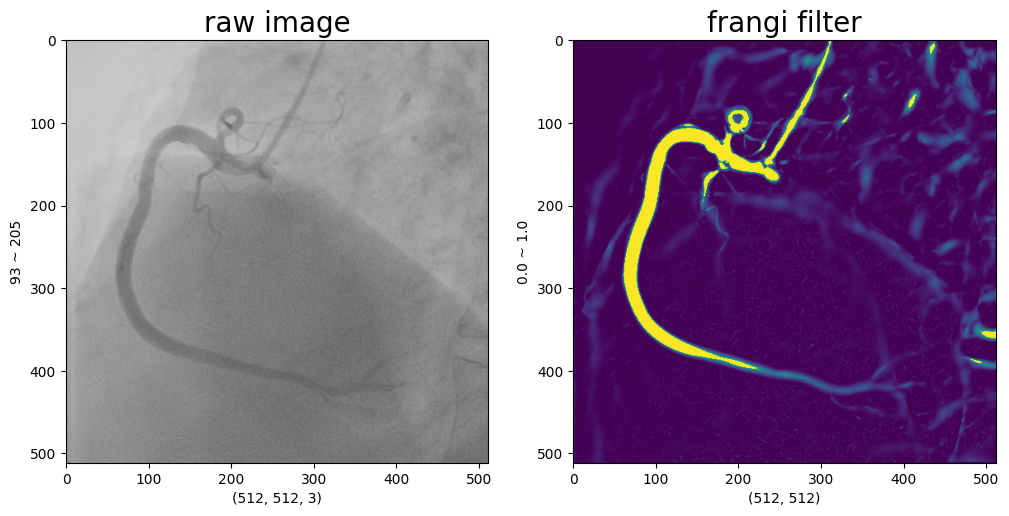

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
show(raw_image,'raw image')
plt.subplot(1,2,2)
show(pred_mask,'frangi filter')